# Project
## Gas Sensor Array Drift

In [18]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_svmlight_file

import matplotlib.pyplot as plt
import seaborn as sns

### Load and read the data

In [20]:
list_features = []
list_targets = []
for i in range(1, 11):
    X, y = load_svmlight_file(f='../Dataset/batch' + str(i) + '.dat', dtype=np.float64)
    X = pd.DataFrame(X.toarray())
    y = pd.Series(y)
    
    list_features.append(X)
    list_targets.append(y)
    
X = pd.concat(list_features, ignore_index=True)
y = pd.concat(list_targets, ignore_index=True)

In [21]:

X.head()

0         1          2          3          4          5    \
0  15596.1621  1.868245   2.371604   2.803678   7.512213  -2.739388   
1  26402.0704  2.532401   5.411209   6.509906   7.658469  -4.722217   
2  42103.5820  3.454189   8.198175  10.508439  11.611003  -7.668313   
3  42825.9883  3.451192  12.113940  16.266853  39.910056  -7.849409   
4  58151.1757  4.194839  11.455096  15.715298  17.654915 -11.083364   

         6          7           8         9    ...       118       119  \
0  -3.344671  -4.847512  15326.6914  1.768526  ... -1.071137 -3.037772   
1  -5.817651  -7.518333  23855.7812  2.164706  ... -1.530519 -1.994993   
2  -9.478675 -12.230939  37562.3008  2.840403  ... -2.384784 -2.867291   
3  -9.689894 -11.921704  38379.0664  2.851173  ... -2.607199 -3.058086   
4 -13.580692 -16.407848  51975.5899  3.480866  ... -3.594763 -4.181920   

         120       121       122       123       124       125       126  \
0  3037.0390  3.972203  0.527291  0.728443  1.445783 -0.545079 -0.902241   
1  4176.4453  4.281373  0.980205  1.628050  1.951172 -0.889333 -1.323505   
2  5914.6685  5.396827  1.403973  2.476956  3.039841 -1.334558 -1.993659   
3  6147.4744  5.501071  1.981933  3.569823  4.049197 -1.432205 -2.146158   
4  8158.6449  7.174334  1.993808  3.829303  4.402448 -1.930107 -2.931265   

        127  
0 -2.654529  
1 -1.749225  
2 -2.348370  
3 -2.488957  
4 -4.088756  

[5 rows x 128 columns]

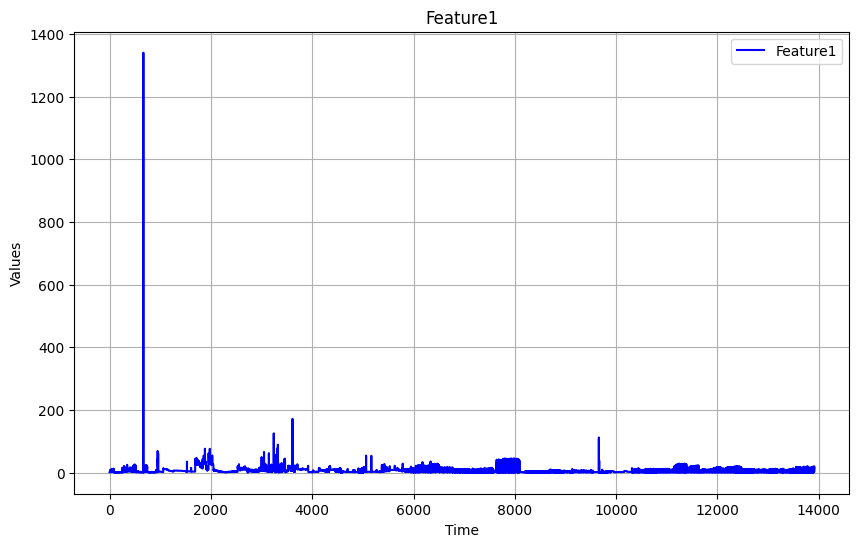

In [77]:
subset_X = X[:168]  # Adjust as needed

# Plotting the 'class' column against the index values for the subset
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.title('Feature1')
plt.xlabel('Time')
plt.ylabel('Values')
plt.plot(X.index.values, X[1], color='blue', label='Feature1')

plt.legend()  # Show legend
plt.grid(True)
plt.show()

In [26]:
X.shape

(13910, 128)

In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13910 entries, 0 to 13909
Columns: 128 entries, 0 to 127
dtypes: float64(128)
memory usage: 13.6 MB


In [28]:
X.describe()

0             1             2             3             4    \
count   13910.000000  13910.000000  13910.000000  13910.000000  13910.000000   
mean    50435.066174      6.638156     12.936688     18.743953     26.890695   
std     69844.785952     13.486391     17.610061     24.899450     38.107685   
min    -16757.598600      0.088287      0.000100      0.000100      0.000100   
25%      6694.725950      2.284843      1.633350      2.386836      4.967988   
50%     19364.439350      3.871227      4.977123      7.250892     11.680725   
75%     63104.837125      8.400619     17.189166     26.411109     34.843226   
max    670687.347700   1339.879283    167.079751    226.619457    993.605306   

                5             6             7              8             9    \
count  13910.000000  13910.000000  13910.000000   13910.000000  13910.000000   
mean      -9.158655    -14.402383    -59.927598   57340.104585      6.648033   
std       12.729206     21.304606    131.017675   64045.265134     15.585780   
min     -131.332873   -227.627758  -1664.735576  -16119.460900      0.185164   
25%      -11.587169    -17.292559    -48.492764   13287.301875      2.776693   
50%       -3.338700     -4.956917    -14.040088   37764.263200      4.734586   
75%       -1.126897     -1.670327     -5.212213   70300.782575      8.608522   
max       -0.006941     22.201589    115.273147  502202.812500   1672.363221   

       ...           118           119           120           121  \
count  ...  13910.000000  13910.000000  13910.000000  13910.000000   
mean   ...     -9.601927    -19.136500  19688.565373      6.072066   
std    ...      9.220031     26.516679  14281.652395      4.642192   
min    ...    -76.069200   -482.278033  -8297.548800      0.712112   
25%    ...    -13.212575    -22.363498   8837.838750      3.007381   
50%    ...     -7.338850    -13.527887  16313.967300      4.973783   
75%    ...     -3.260080     -7.358031  27009.592425      7.389566   
max    ...      9.270956     11.516418  96706.792700     45.574835   

                122           123           124           125           126  \
count  13910.000000  13910.000000  13910.000000  13910.000000  13910.000000   
mean       7.138634     14.929364     19.090980     -4.901016     -8.167792   
std        5.248573     12.437311     14.391810      4.195360      7.637701   
min        0.003238      0.011488      0.118849    -30.205911    -58.844076   
25%        3.059178      5.407551      8.039227     -6.789599    -11.162406   
50%        5.809107     11.325214     14.560676     -3.881763     -6.305962   
75%       10.222169     21.207572     26.547437     -1.804032     -2.874532   
max       32.203601    297.225880    195.242555     -0.003817      6.851792   

                127  
count  13910.000000  
mean     -16.089791  
std       20.958479  
min     -410.152297  
25%      -18.938690  
50%      -11.747499  
75%       -6.429690  
max        8.357968  

[8 rows x 128 columns]

### Distribution of Mean

<Axes: >

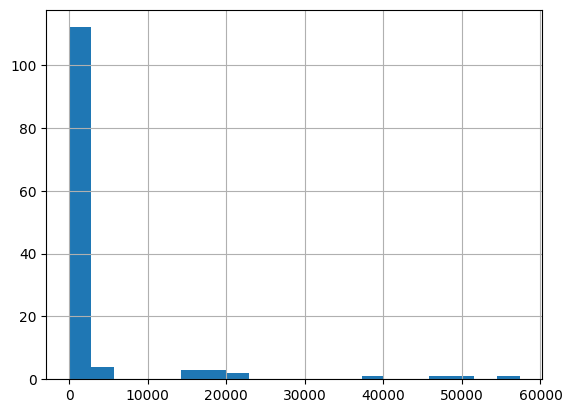

In [50]:
X.mean().hist(bins=20)

### Mean of Features

<Axes: >

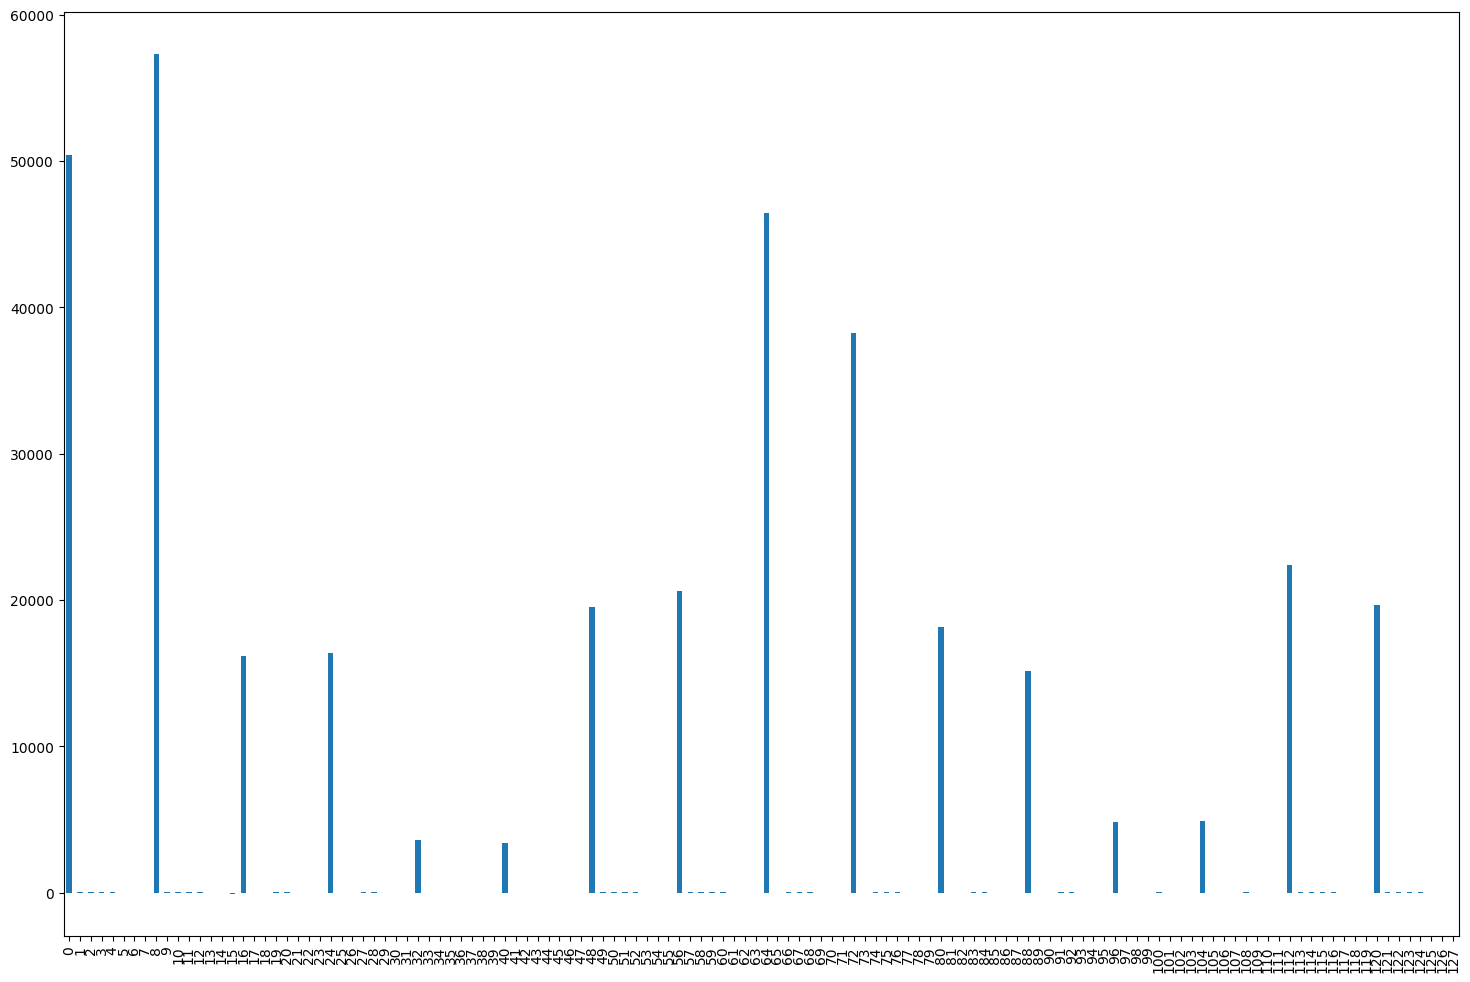

In [51]:
X.mean().plot(kind='bar', figsize=(18,12))

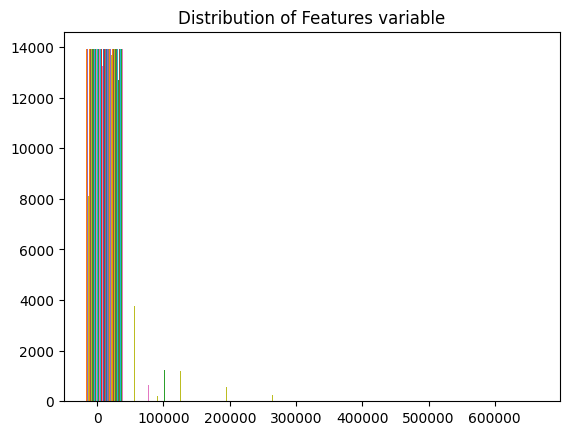

In [52]:
plt.hist(X);
plt.title('Distribution of Features variable');

### Heat map coleration between the features

In [53]:
correlation = X.corr()
correlation.head()

0         1         2         3         4         5         6    \
0  1.000000  0.197385  0.983710  0.964275  0.852414 -0.951382 -0.882787   
1  0.197385  1.000000  0.221950  0.232599  0.172611 -0.203149 -0.175007   
2  0.983710  0.221950  1.000000  0.992760  0.876528 -0.944900 -0.883919   
3  0.964275  0.232599  0.992760  1.000000  0.900978 -0.927958 -0.878868   
4  0.852414  0.172611  0.876528  0.900978  1.000000 -0.788019 -0.810009   

        7         8         9    ...       118       119       120       121  \
0 -0.677211  0.925908  0.109630  ... -0.467363 -0.318420  0.584990  0.364002   
1 -0.093077  0.199855  0.311957  ... -0.216999 -0.126975  0.265716  0.237435   
2 -0.682115  0.908774  0.125443  ... -0.502787 -0.344844  0.622557  0.389360   
3 -0.685374  0.890924  0.132648  ... -0.517139 -0.369974  0.631761  0.397698   
4 -0.729528  0.810652  0.095071  ... -0.512058 -0.431462  0.597039  0.380994   

        122       123       124       125       126       127  
0  0.364573  0.116011  0.097713 -0.520602 -0.473974 -0.319290  
1  0.276329  0.361492  0.227359 -0.243217 -0.223689 -0.132333  
2  0.419206  0.166136  0.148007 -0.557404 -0.510671 -0.347064  
3  0.440495  0.190516  0.176846 -0.566290 -0.526193 -0.372958  
4  0.433582  0.198069  0.218291 -0.537111 -0.519817 -0.427085  

[5 rows x 128 columns]

<Axes: >

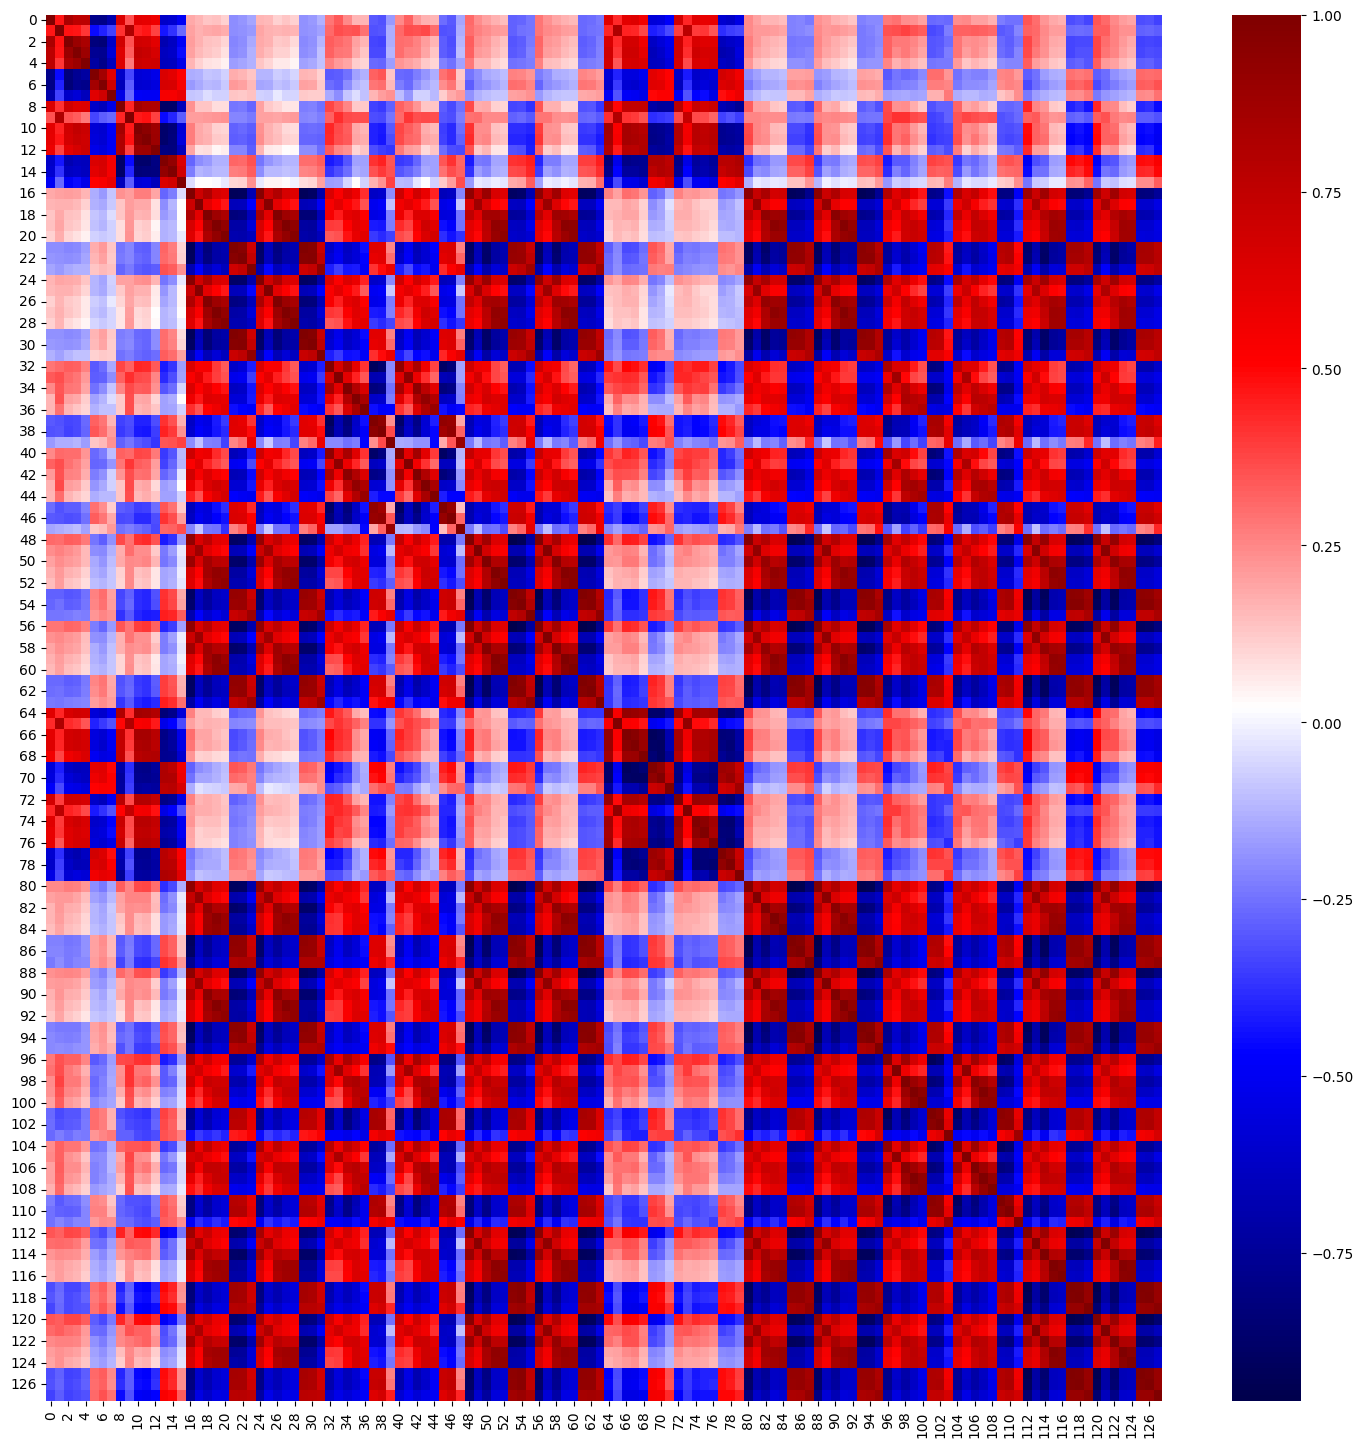

In [47]:
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(correlation, cmap='seismic')

### Only high correlations (above 0.75)

C:\Users\User1\AppData\Local\Temp\ipykernel_27240\2066025417.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  high_correlation = correlation.applymap(lambda x: x if x > 0.75 or x < -0.75 else 0)


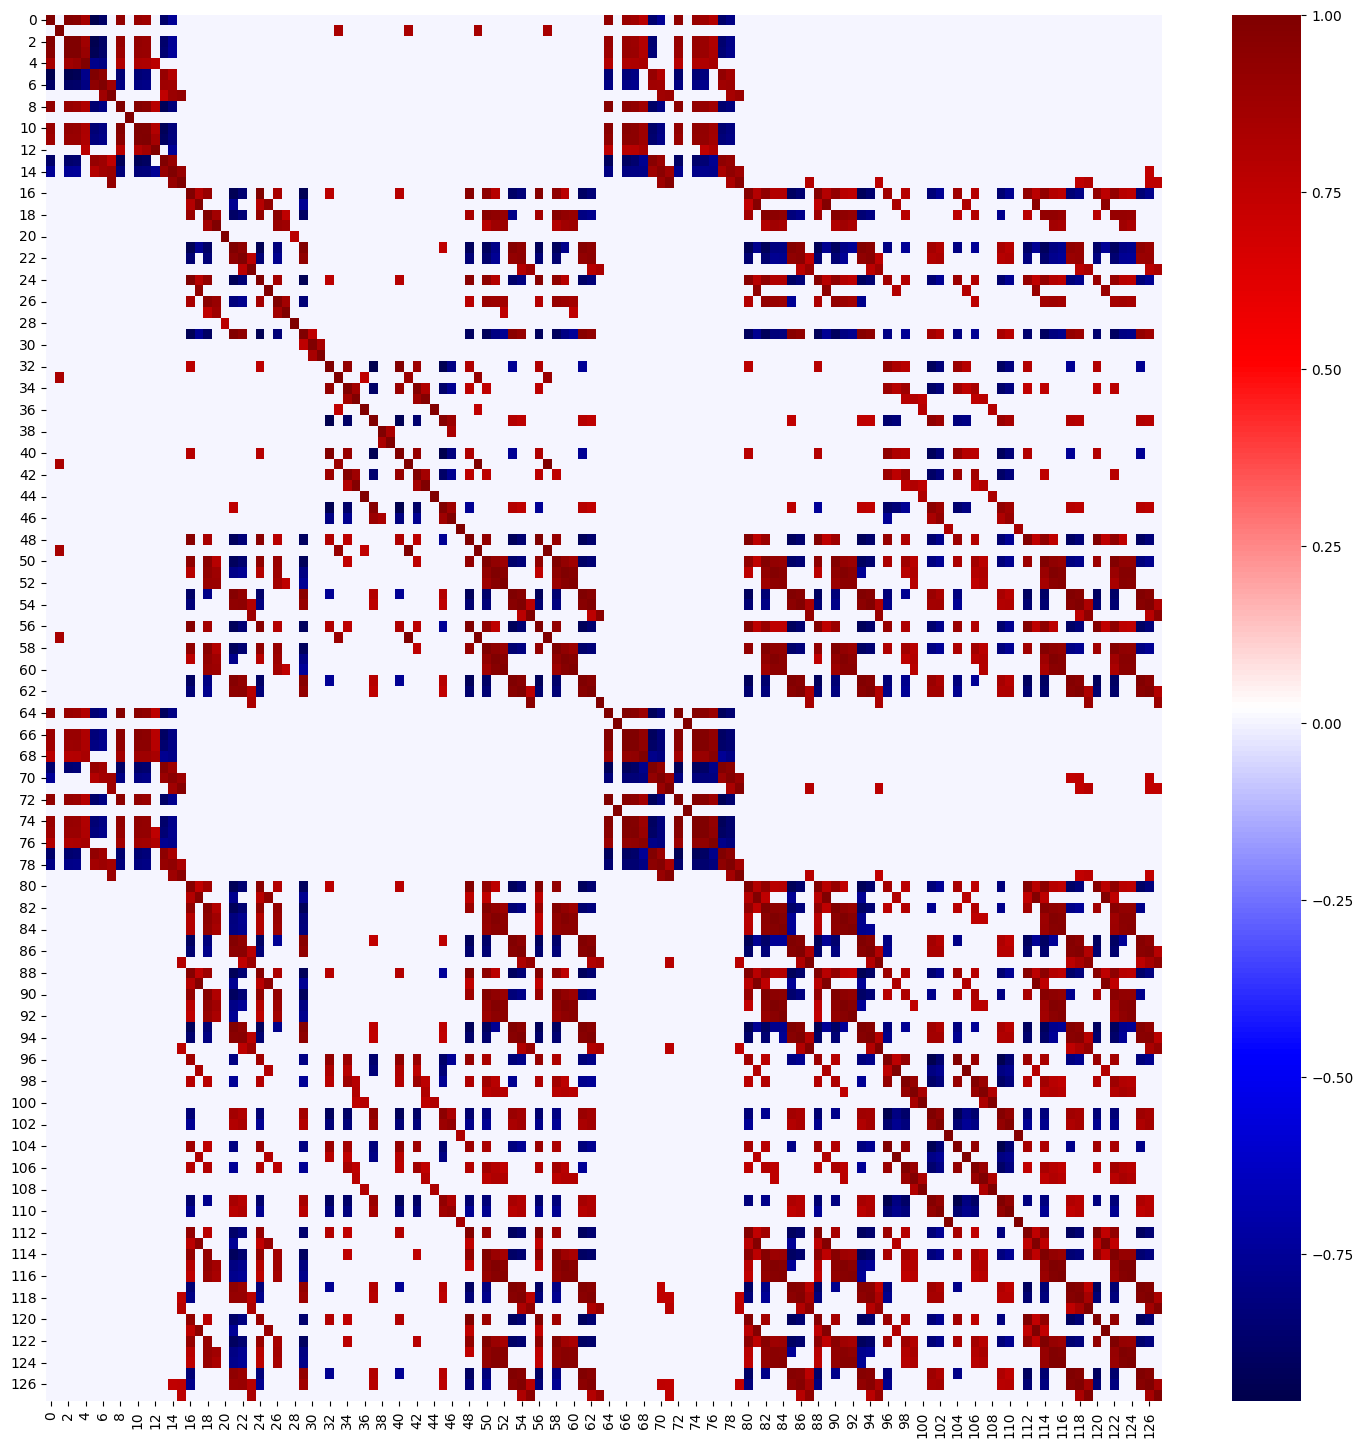

In [55]:
high_correlation = correlation.applymap(lambda x: x if x > 0.75 or x < -0.75 else 0)

fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(high_correlation, cmap='seismic') # 'Blues'
plt.savefig('correlation_75.png')

### Feature3

<Axes: >

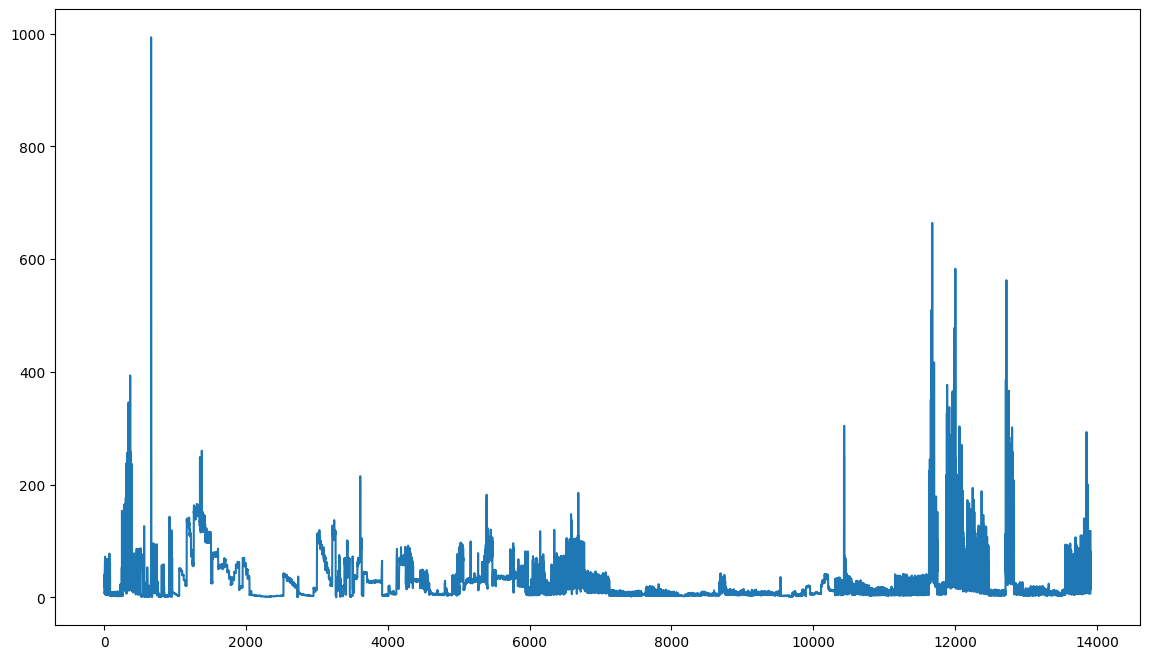

In [56]:
X[4].plot(figsize=(14,8))

### Time series only for one class

<Axes: >

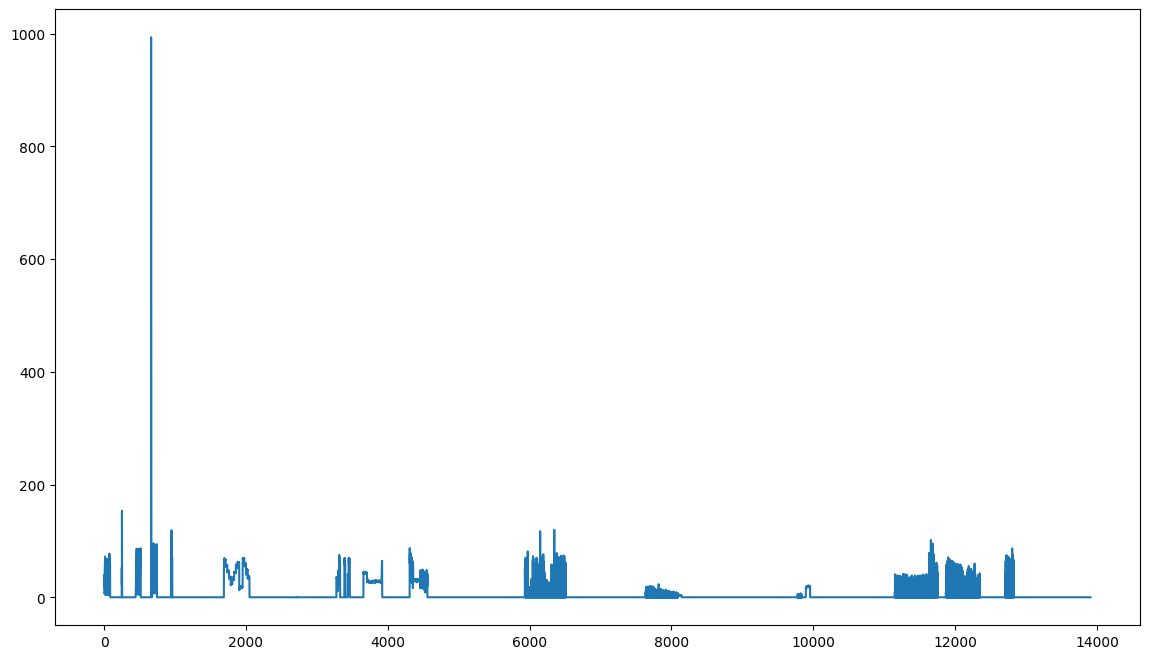

In [114]:
X_4 = X[4].copy()
X_4.loc[~X.index.isin(y[y == 1].index)] = 0
X_4.plot(figsize=(14,8))

### cocat the Features and target 

In [59]:
y.name = 'target'
data = pd.concat([X, y], axis=1)

In [60]:
data.tail()

0        1        2        3         4        5        6  \
13905   28929.5108   3.3092   4.3933   5.0570    9.4233  -3.8794  -5.4151   
13906   40392.1230   3.2800  10.2689  13.5859   20.9790  -8.1732 -10.8591   
13907  183271.5898  15.5945  45.4803  63.8775   81.1396 -29.5391 -47.6266   
13908   29059.8516   2.5680   6.7142   8.7865   13.9878  -6.0411  -8.0707   
13909  230762.7607  19.1666  60.9364  87.8557  117.3414 -36.4210 -69.1454   

              7            8        9  ...       119         120      121  \
13905  -15.9335   42203.8965   3.3778  ...   -4.4808   5480.6582   2.8510   
13906  -31.8027   40322.3164   2.5940  ...  -15.9494  15700.0969   5.2162   
13907 -329.2669  229854.3418  14.5194  ...  -62.7457  50936.2070  17.8080   
13908  -22.3223   28441.1289   2.0694  ...  -10.4091  10079.5098   3.5399   
13909 -630.8696  287258.4492  17.2688  ... -172.2925  86175.8168  29.4131   

           122      123      124       125      126       127  target  
13905   1.0465   2.0399   5.3419  -0.84283  -1.4077   -4.4479     5.0  
13906   5.1675   8.9950  11.5917  -4.49540  -7.6553  -12.7671     4.0  
13907  17.2887  26.7895  33.3661 -15.82370 -28.5162  -56.3328     5.0  
13908   3.2660   6.2499   9.0262  -2.84950  -4.7343   -9.5731     4.0  
13909  29.8310  49.2269  60.6098 -28.62770 -54.2548 -125.5888     5.0  

[5 rows x 129 columns]

In [61]:
cols_to_plot = [i for i in range(0, 128, 8)]
cols_to_plot.append('target')
cols_to_plot

[0, 8, 16, 24, 32, 40, 48, 56, 64, 72, 80, 88, 96, 104, 112, 120, 'target']

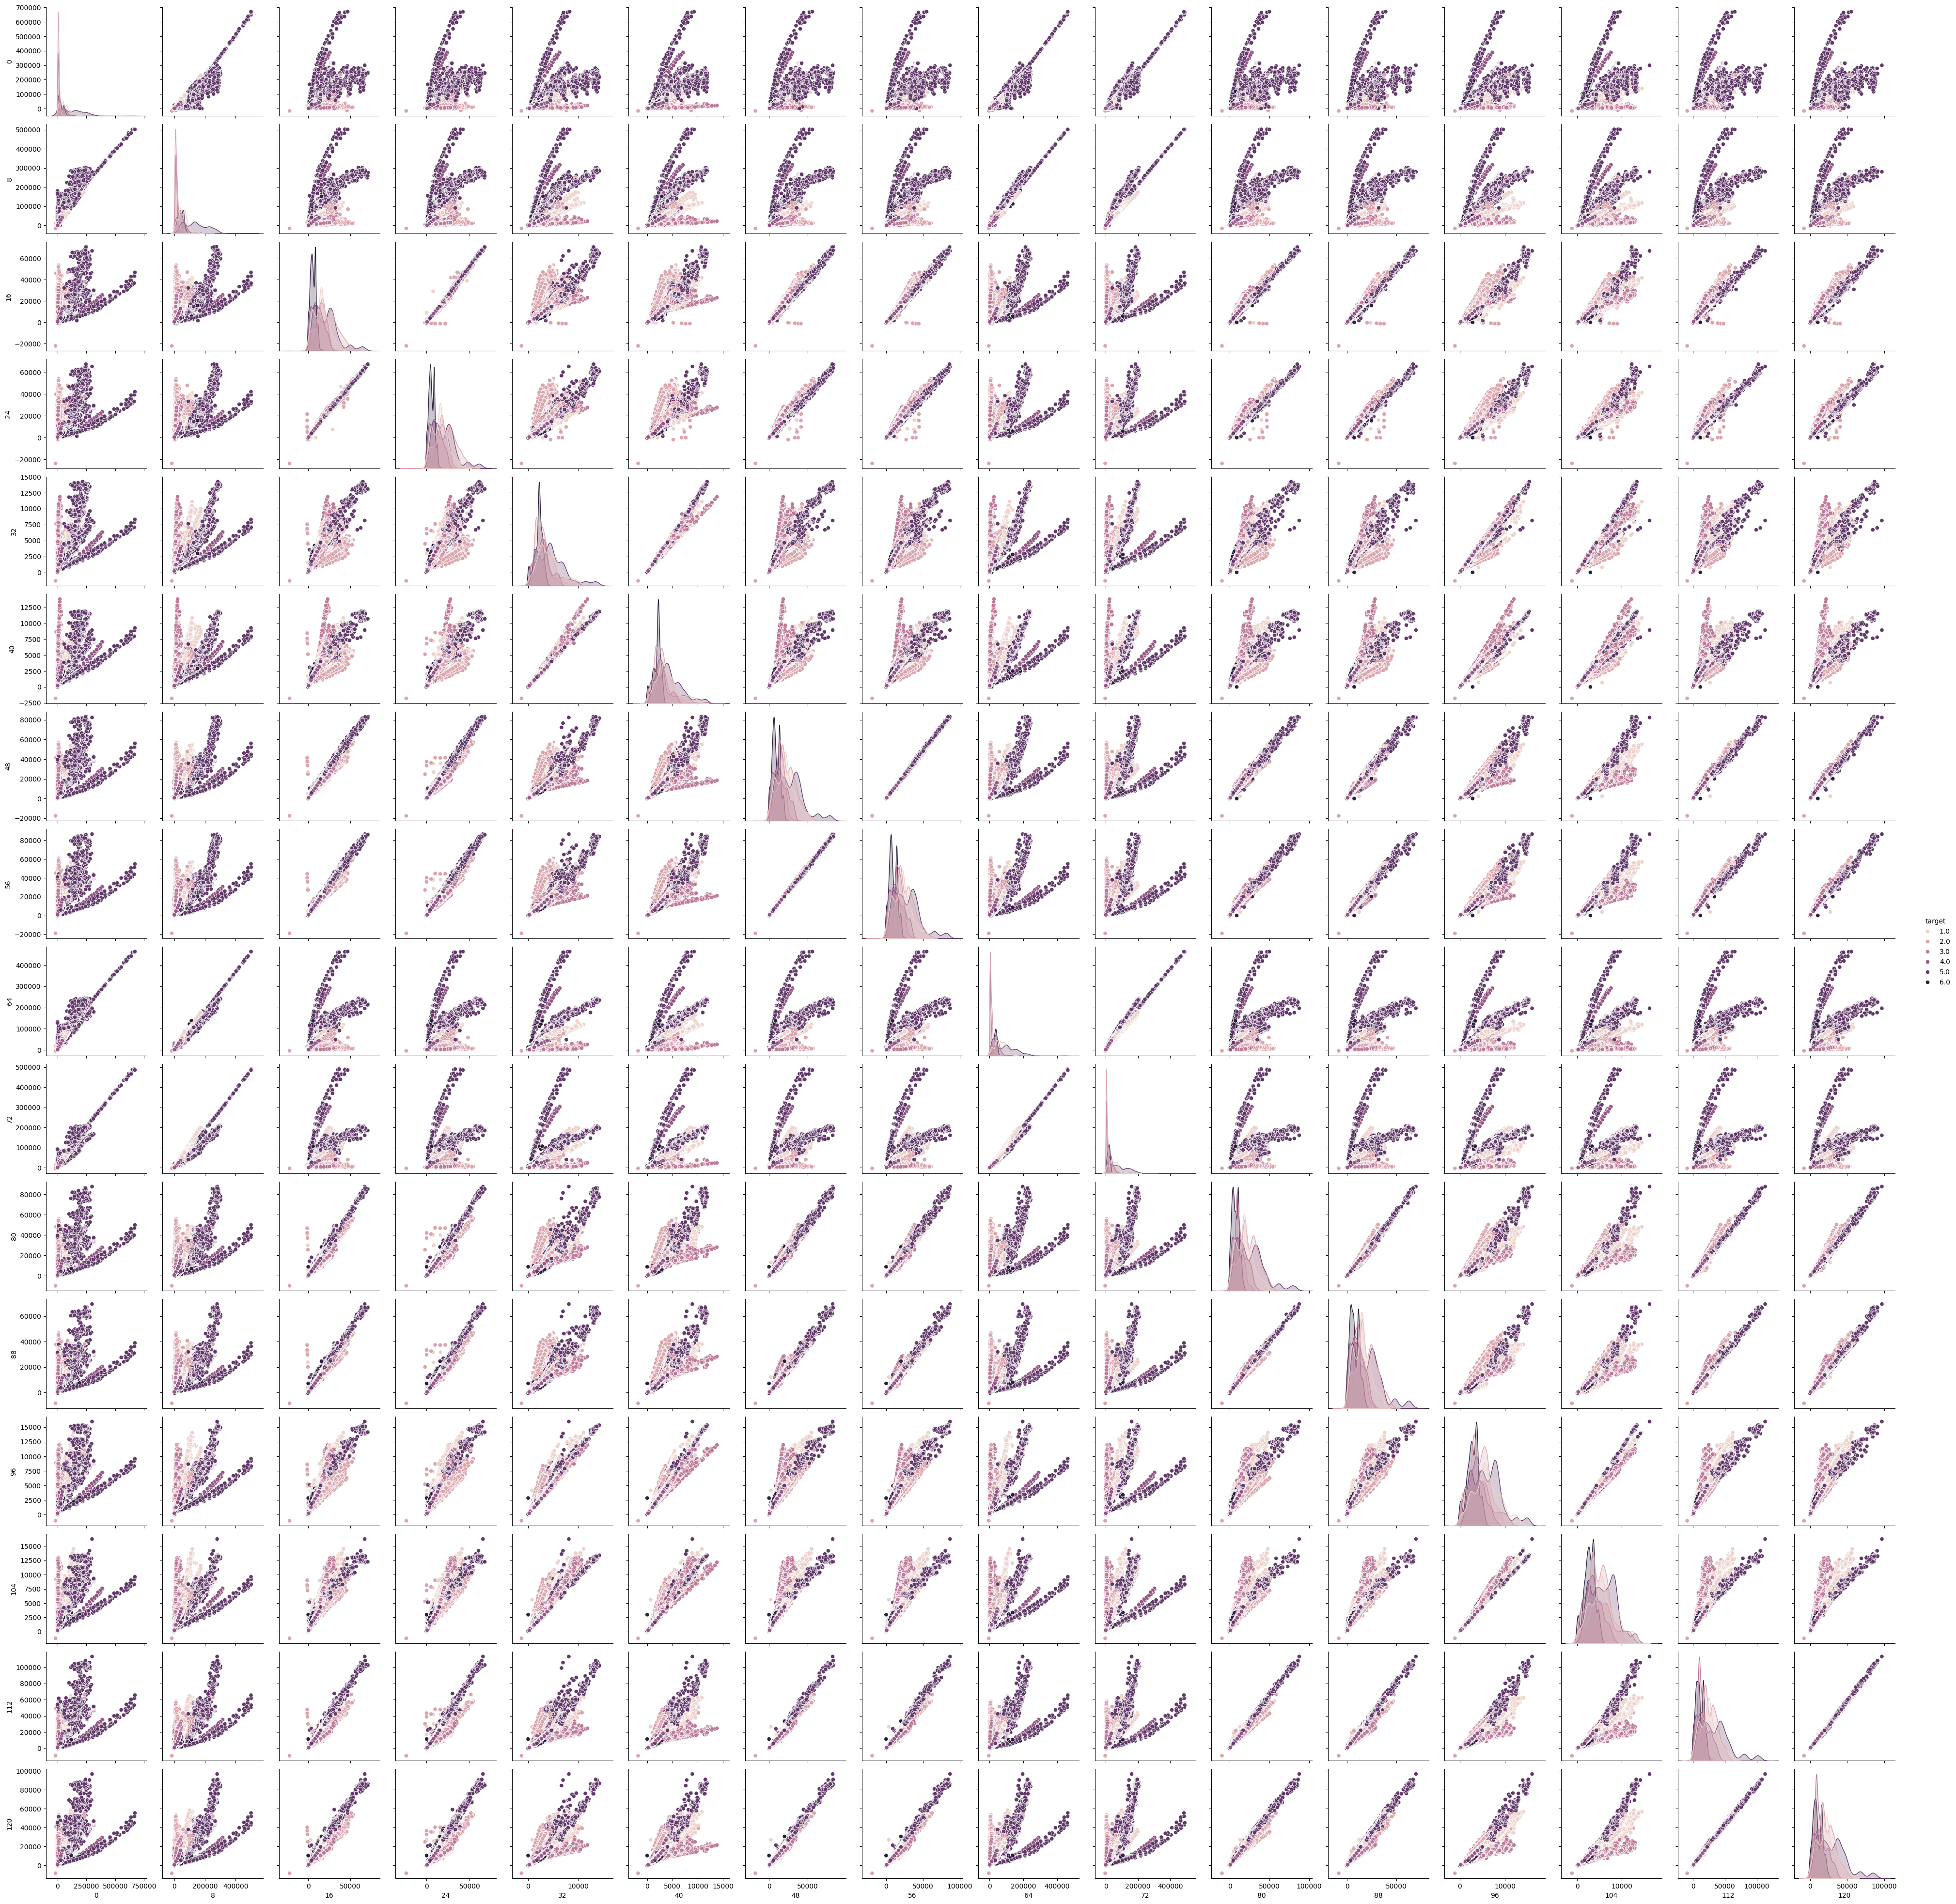

In [62]:
sns.pairplot(data[cols_to_plot], hue='target')
plt.savefig('pairplot.png')

### Outliers Detection

<Axes: xlabel='0'>

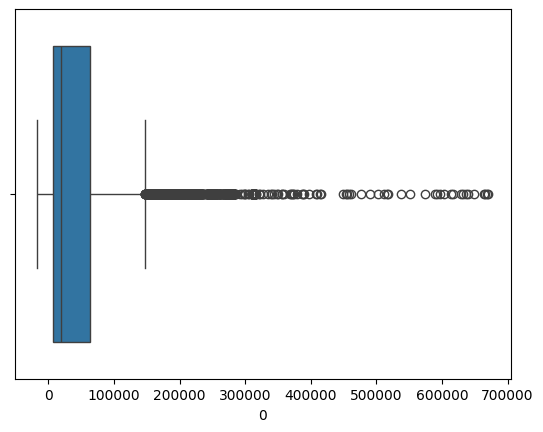

In [63]:
sns.boxplot(X[0], orient='h')

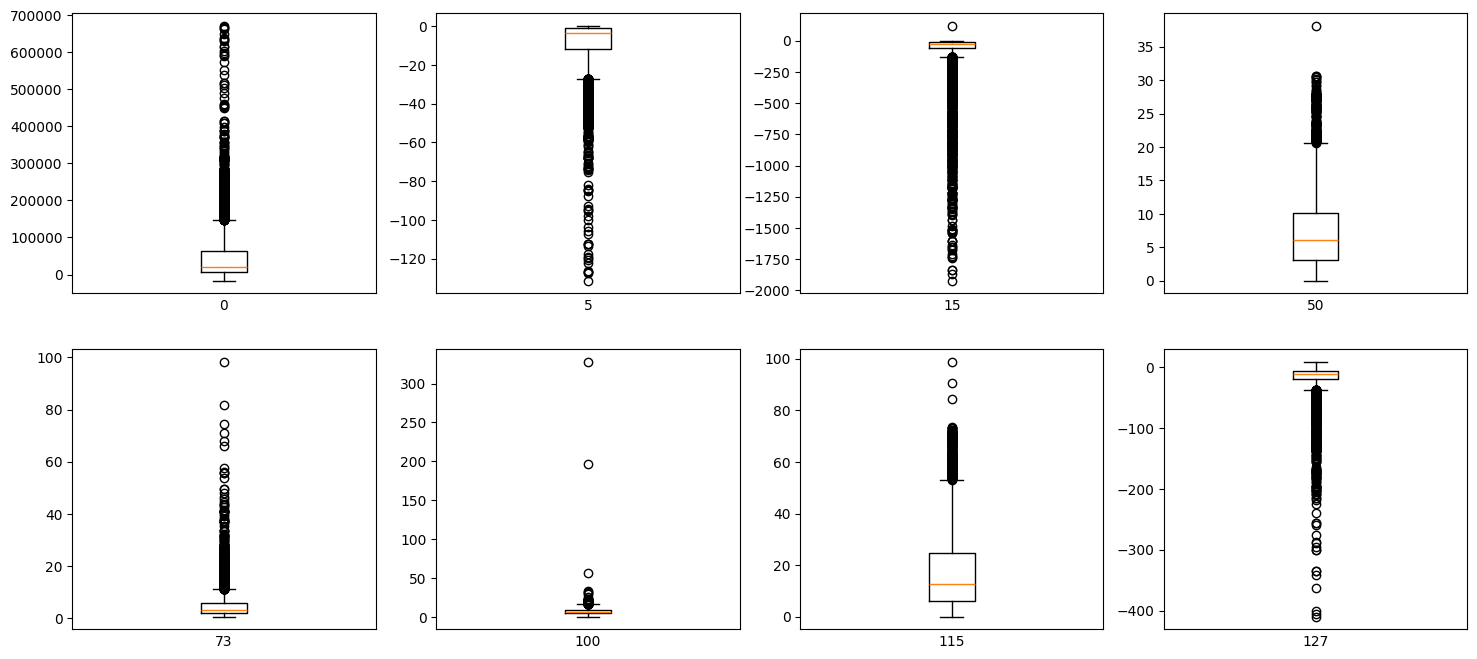

In [81]:
cols_to_plot = [0, 5, 15, 50, 73, 100, 115, 127]
fig, ax = plt.subplots(2,4, figsize=(18,8))

count = 0
for i in range(2):
    for j in range(4):
        ax[i][j].boxplot(X[cols_to_plot[count]])
        ax[i][j].set_xticks([])
        ax[i][j].set_xlabel(cols_to_plot[count])
        count += 1
        
plt.show()

<Axes: ylabel='0'>

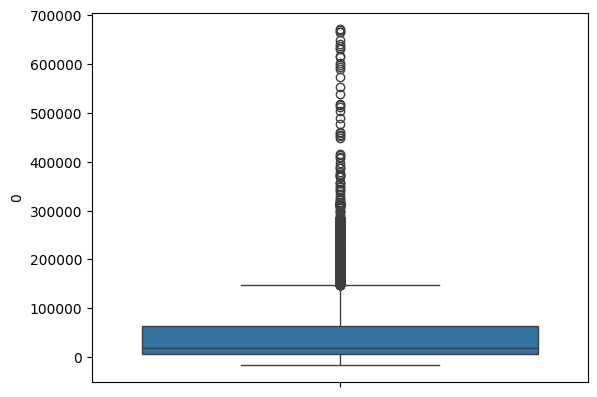

In [66]:
sns.boxplot(X[0], orient='vertical')

In [67]:
def count_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    return column[(column < (q1 - 1.5 * iqr)) | (column > (q3 + 1.5 * iqr))].count()

In [68]:
outliers_columns= X.apply(count_outliers)

In [69]:
outliers_columns[outliers_columns == 0]

Series([], dtype: int64)

<Axes: >

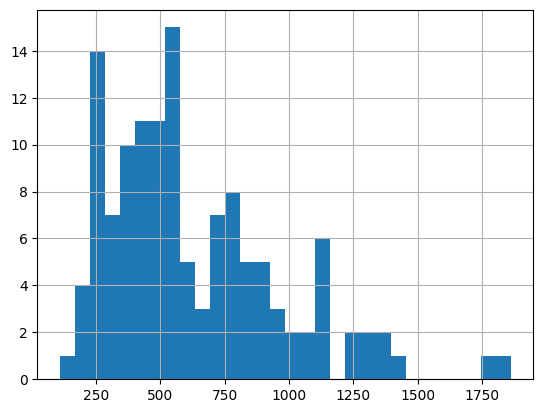

In [70]:
outliers_columns.hist(bins=30)

### Target Class Distribution

In [74]:
y.describe()

count    13910.000000
mean         3.387994
std          1.728602
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          6.000000
Name: target, dtype: float64

In [75]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 13910 entries, 0 to 13909
Series name: target
Non-Null Count  Dtype  
--------------  -----  
13910 non-null  float64
dtypes: float64(1)
memory usage: 108.8 KB


In [71]:
y.value_counts()

target
5.0    3009
2.0    2926
1.0    2565
4.0    1936
6.0    1833
3.0    1641
Name: count, dtype: int64

<Axes: title={'center': 'Distribution per class'}, xlabel='target'>

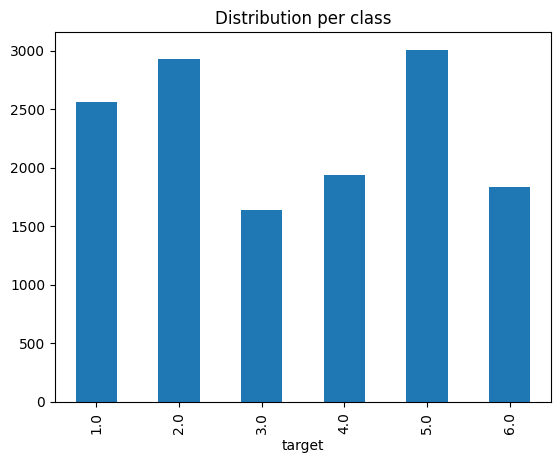

In [76]:
#(1: Ethanol; 2: Ethylene; 3:Ammonia; 4: Acetaldehyde; 5: Acetone; 6: Toluene)
y.value_counts().sort_index().plot(kind='bar', title='Distribution per class')


##  Enabling analysis and visualization based on monthly intervals.

In [100]:
examples_by_month = [248, 197, 217, 261, 20, 15, 731, 506, 526, 554, 113, 48, 197, 20, 3, 652, 1625, 3613, 163, 131, 54, 416, 3600]

#128 * 60  = 867 feature
#1Batch 1	        Months 1 and 2
#Batch 2	        Months 3, 4, 8, 9 and 10
#Batch 3	        Months 11, 12, and 13
#Batch 4	        Months 14 and 15
#Batch 5	        Month 16
#Batch 6	        Months 17, 18, 19, and 20
#Batch 7	        Month 21
#Batch 8	        Months 22 and 23
#Batch 9	        Months 24 and 30
#Batch 10	Month 36

In [101]:
examples_by_month_complete = [0]
for i, j in enumerate(examples_by_month):
    if i == 0:
        examples_by_month_complete.append(j-1)
    else:
        examples_by_month_complete.append(j+examples_by_month_complete[i])

In [102]:
months = [1, 2, 3, 4, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 30, 36]

In [115]:
X = X.reset_index()
X['month'] = pd.cut(X['index'], bins=examples_by_month_complete, labels=months, include_lowest=True)

In [104]:
X.tail()

level_0  index            0        1        2        3         4  \
13905    13905  13905   28929.5108   3.3092   4.3933   5.0570    9.4233   
13906    13906  13906   40392.1230   3.2800  10.2689  13.5859   20.9790   
13907    13907  13907  183271.5898  15.5945  45.4803  63.8775   81.1396   
13908    13908  13908   29059.8516   2.5680   6.7142   8.7865   13.9878   
13909    13909  13909  230762.7607  19.1666  60.9364  87.8557  117.3414   

             5        6         7  ...       119         120      121  \
13905  -3.8794  -5.4151  -15.9335  ...   -4.4808   5480.6582   2.8510   
13906  -8.1732 -10.8591  -31.8027  ...  -15.9494  15700.0969   5.2162   
13907 -29.5391 -47.6266 -329.2669  ...  -62.7457  50936.2070  17.8080   
13908  -6.0411  -8.0707  -22.3223  ...  -10.4091  10079.5098   3.5399   
13909 -36.4210 -69.1454 -630.8696  ... -172.2925  86175.8168  29.4131   

           122      123      124       125      126       127  month  
13905   1.0465   2.0399   5.3419  -0.84283  -1.4077   -4.4479     36  
13906   5.1675   8.9950  11.5917  -4.49540  -7.6553  -12.7671     36  
13907  17.2887  26.7895  33.3661 -15.82370 -28.5162  -56.3328     36  
13908   3.2660   6.2499   9.0262  -2.84950  -4.7343   -9.5731     36  
13909  29.8310  49.2269  60.6098 -28.62770 -54.2548 -125.5888     36  

[5 rows x 131 columns]

In [105]:
X.drop('index', axis=1, inplace=True)

In [106]:
X.tail()

level_0            0        1        2        3         4        5  \
13905    13905   28929.5108   3.3092   4.3933   5.0570    9.4233  -3.8794   
13906    13906   40392.1230   3.2800  10.2689  13.5859   20.9790  -8.1732   
13907    13907  183271.5898  15.5945  45.4803  63.8775   81.1396 -29.5391   
13908    13908   29059.8516   2.5680   6.7142   8.7865   13.9878  -6.0411   
13909    13909  230762.7607  19.1666  60.9364  87.8557  117.3414 -36.4210   

             6         7            8  ...       119         120      121  \
13905  -5.4151  -15.9335   42203.8965  ...   -4.4808   5480.6582   2.8510   
13906 -10.8591  -31.8027   40322.3164  ...  -15.9494  15700.0969   5.2162   
13907 -47.6266 -329.2669  229854.3418  ...  -62.7457  50936.2070  17.8080   
13908  -8.0707  -22.3223   28441.1289  ...  -10.4091  10079.5098   3.5399   
13909 -69.1454 -630.8696  287258.4492  ... -172.2925  86175.8168  29.4131   

           122      123      124       125      126       127  month  
13905   1.0465   2.0399   5.3419  -0.84283  -1.4077   -4.4479     36  
13906   5.1675   8.9950  11.5917  -4.49540  -7.6553  -12.7671     36  
13907  17.2887  26.7895  33.3661 -15.82370 -28.5162  -56.3328     36  
13908   3.2660   6.2499   9.0262  -2.84950  -4.7343   -9.5731     36  
13909  29.8310  49.2269  60.6098 -28.62770 -54.2548 -125.5888     36  

[5 rows x 130 columns]

### Number of examples per month

In [108]:
X['month'].value_counts().sort_index()

month
1      248
2      197
3      217
4      261
8       20
9       15
10     731
11     506
12     526
13     554
14     113
15      48
16     197
17      20
18       3
19     652
20    1625
21    3613
22     163
23     131
24      54
30     416
36    3600
Name: count, dtype: int64

### Number of gases per month

In [109]:
gass_count_by_month = []
for idx, rows in X.groupby('month'):
    count_gass = y.loc[rows.index].value_counts()
    count_gass.name = idx
    gass_count_by_month.append(count_gass)

C:\Users\User1\AppData\Local\Temp\ipykernel_27240\1747408230.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for idx, rows in X.groupby('month'):


In [110]:
df_gass_month = pd.concat(gass_count_by_month, axis=1).fillna(0).T

In [111]:
df_gass_month

target    2.0    1.0    3.0    6.0    5.0    4.0
1        88.0   84.0   76.0    0.0    0.0    0.0
2        10.0    6.0    7.0   74.0   70.0   30.0
3       140.0   70.0    0.0    0.0    7.0    0.0
4       170.0   82.0    0.0    5.0    0.0    4.0
8        20.0    0.0    0.0    0.0    0.0    0.0
9         4.0   11.0    0.0    0.0    0.0    0.0
10        0.0    1.0  100.0    0.0  525.0  105.0
11      146.0  360.0    0.0    0.0    0.0    0.0
12      334.0    0.0    0.0    0.0    0.0  192.0
13       10.0    5.0  216.0    0.0  275.0   48.0
14       43.0   52.0    0.0    0.0    0.0   18.0
15        0.0   12.0   12.0    0.0   12.0   12.0
16       40.0   28.0   20.0    0.0   63.0   46.0
17       20.0    0.0    0.0    0.0    0.0    0.0
18        3.0    0.0    0.0    0.0    0.0    0.0
19      100.0  264.0  110.0    9.0  140.0   29.0
20      451.0  250.0    0.0  458.0  466.0    0.0
21      662.0  649.0  360.0  568.0  630.0  744.0
22        0.0    0.0   25.0    0.0  123.0   15.0
23       30.0   30.0   15.0   18.0   20.0   18.0
24        0.0    0.0    0.0    1.0   28.0   25.0
30       55.0   61.0  100.0  100.0   50.0   50.0
36      600.0  600.0  600.0  600.0  600.0  600.0

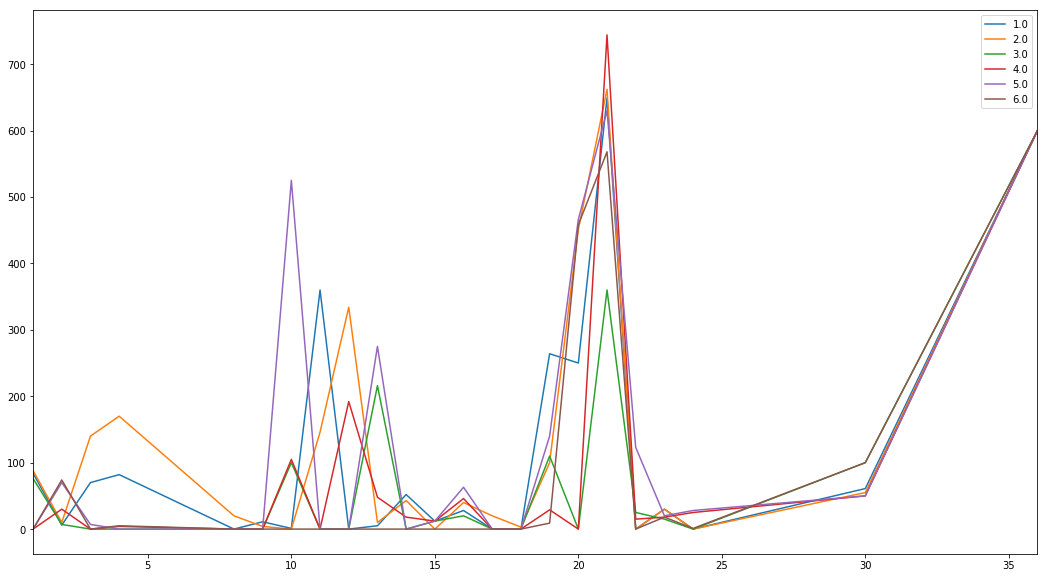

In [56]:
df_gass_month.plot(figsize=(18,10))
plt.savefig('gases_tempo_todos.png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


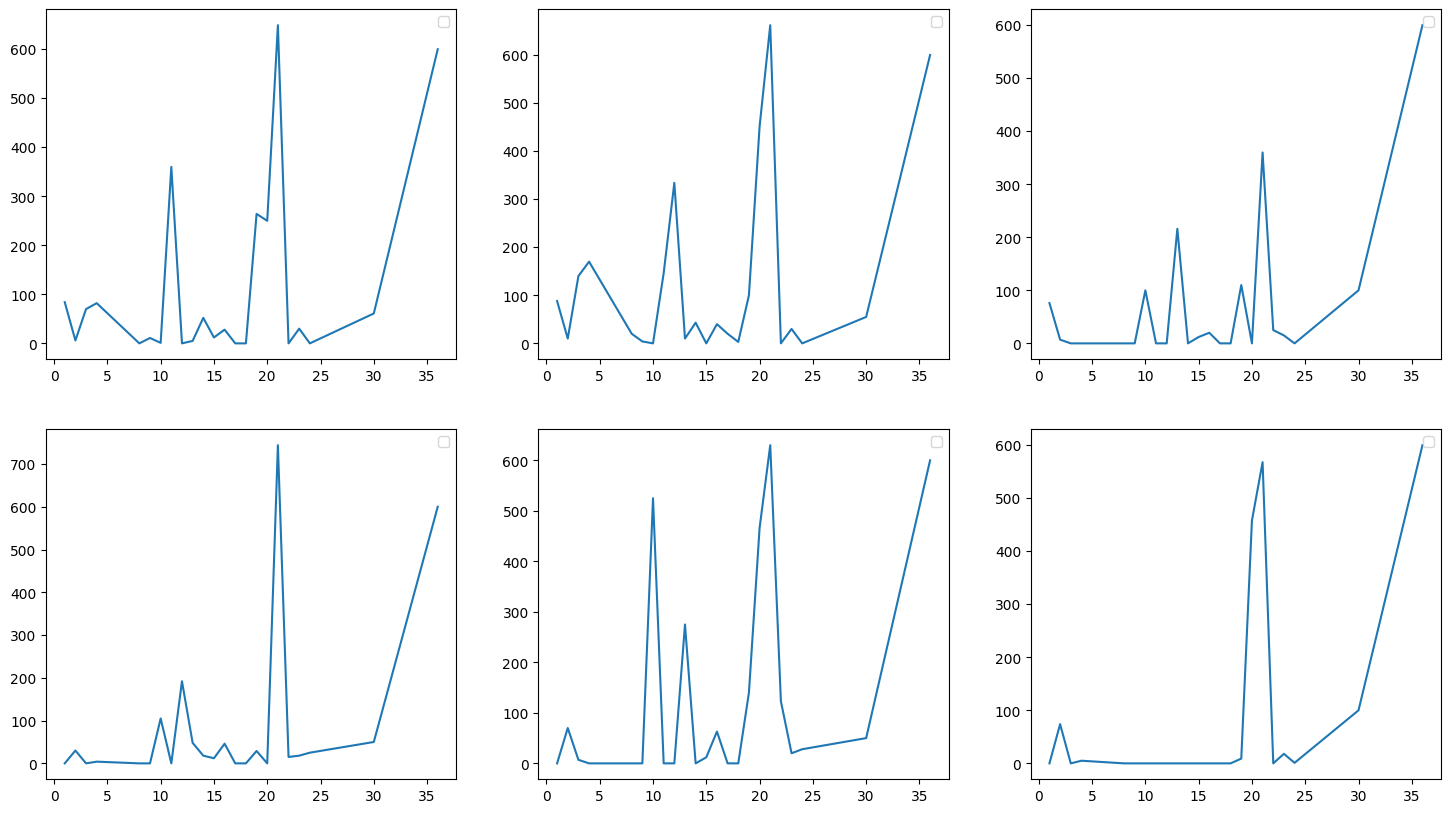

In [112]:
fig, ax = plt.subplots(2,3, figsize=(18,10))
ax[0][0].plot(df_gass_month[1])
ax[0][1].plot(df_gass_month[2])
ax[0][2].plot(df_gass_month[3])
ax[1][0].plot(df_gass_month[4])
ax[1][1].plot(df_gass_month[5])
ax[1][2].plot(df_gass_month[6])

ax[0][0].legend()
ax[0][1].legend()
ax[0][2].legend()
ax[1][0].legend()
ax[1][1].legend()
ax[1][2].legend()

plt.savefig('gases_tempo.png')

<Axes: >

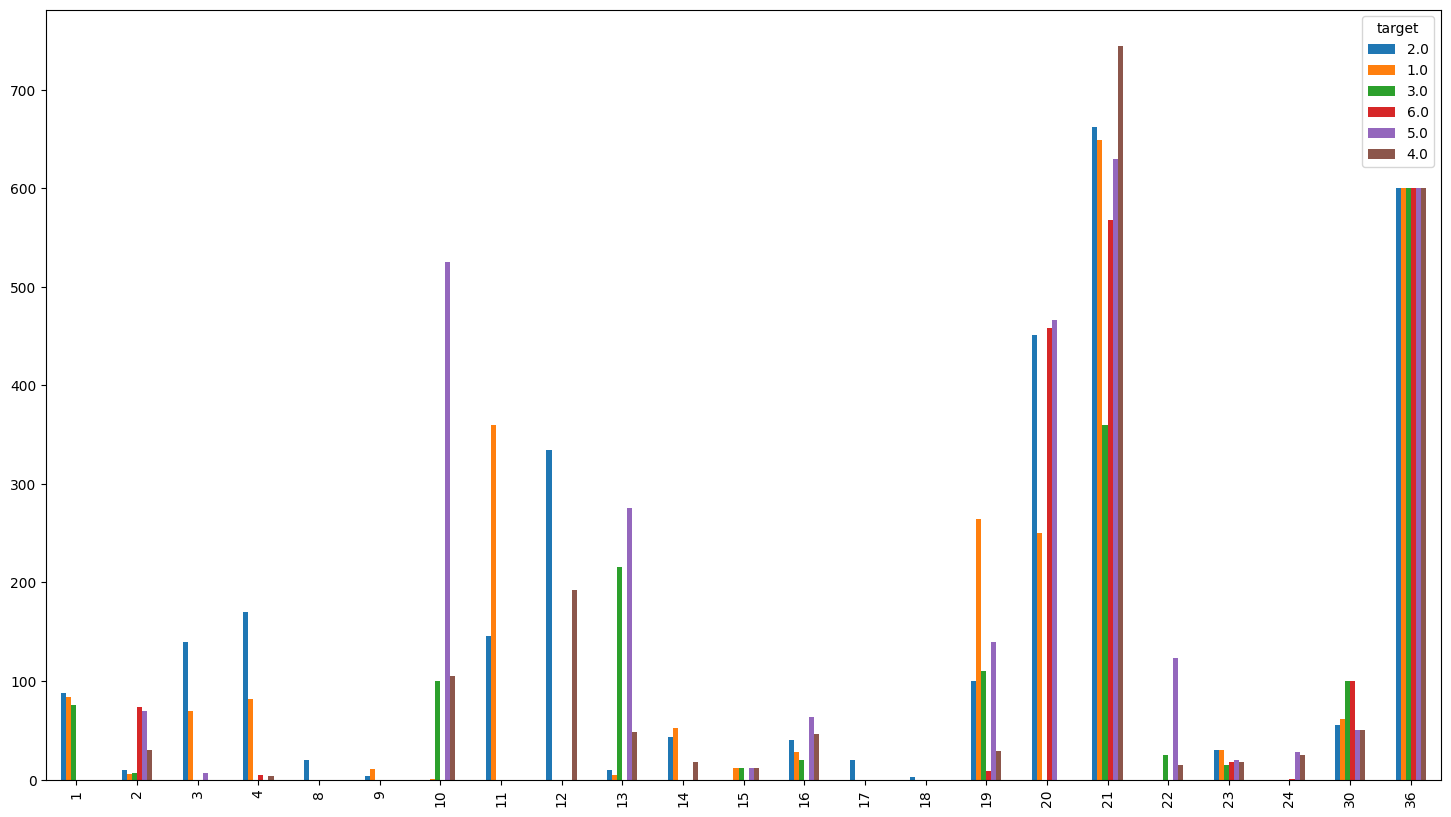

In [113]:
df_gass_month.plot(kind='bar', figsize=(18,10))